In [68]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import seaborn as sns
import script
import matplotlib.pyplot as plt
from itertools import product
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, RepeatedKFold, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
import statsmodels.api as sma

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
df = pd.read_csv('data/sample_data.csv')
df

,space,rent
0,20,13.958824
1,25,11.533805
2,28,14.269547
3,30,18.722680
4,36,19.602674
5,51,16.068166
6,55,23.183599
7,62,22.212595
8,83,29.357010
9,103,37.565129


In [12]:
x = df['space'].values
y = df['rent'].values
X = np.vstack([np.ones(len(x)), x]).T
X

array([[  1.,  20.],
       [  1.,  25.],
       [  1.,  28.],
       [  1.,  30.],
       [  1.,  36.],
       [  1.,  51.],
       [  1.,  55.],
       [  1.,  62.],
       [  1.,  83.],
       [  1., 103.]])

## 正規方程式

In [13]:
x = df['space'].values
y = df['rent'].values

X = np.vstack([np.ones(len(x)), x]).T
best_theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
best_theta

array([7.0962325 , 0.27487161])

## scikit-learnで線形回帰

In [14]:
model = LinearRegression()
# データの準備
X = x.reshape(-1, 1)
model.fit(X, y)

LinearRegression()

In [15]:
model.predict(X)
# coefffecient 係数
model.coef_

array([0.27487161])

In [16]:
# intercept 切片
model.intercept_

7.09623249990884

## 特徴量スケーリング

In [17]:
# データのロード
df = pd.read_csv('data/sample_data2.csv')
df


,space,rent,age
0,20,13.958824,3
1,25,11.533805,13
2,28,14.269547,18
3,30,18.722680,10
4,36,19.602674,6
5,51,16.068166,1
6,55,23.183599,5
7,62,22.212595,2
8,83,29.357010,5
9,103,37.565129,23


In [18]:
X = df[['space', 'age']]
# 標準化
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

pd.DataFrame(X_scaled, columns=X.columns)

,space,age
0,-1.134662,-0.806277
1,-0.941034,0.633504
2,-0.824857,1.353394
3,-0.747405,0.201569
4,-0.515051,-0.374343
5,0.065834,-1.094233
6,0.220736,-0.518321
7,0.491816,-0.950255
8,1.305055,-0.518321
9,2.079569,2.073284


# 線形回帰の解釈

## t検定

In [19]:
df = pd.read_csv('data/sample_data2.csv')

In [20]:
# space,ageを特徴量 rentを目的変数 データ準備
y_col = 'rent'
X = df.drop(columns=[y_col])
Y = df[y_col]

# 線形回帰
# バイアス高追加
X = sma.add_constant(X)
est = sma.OLS(y, X)
est_trained = est.fit()
print(est_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     32.66
Date:                Tue, 23 Apr 2024   Prob (F-statistic):           0.000282
Time:                        08:56:36   Log-Likelihood:                -22.687
No. Observations:                  10   AIC:                             51.37
Df Residuals:                       7   BIC:                             52.28
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4150      2.043      3.140      0.0

/Users/urakamitakuya/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## 線形回帰の解釈

In [21]:
df = pd.read_csv('data/sample_data2.csv')
df

y_col = 'rent'
X = df.drop(columns=[y_col])
y = df[y_col]

In [22]:
# バイアス項追加
X = sma.add_constant(X)
est = sma.OLS(y, X)
est_trained = est.fit()
print(est_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                   rent   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     32.66
Date:                Tue, 23 Apr 2024   Prob (F-statistic):           0.000282
Time:                        08:56:36   Log-Likelihood:                -22.687
No. Observations:                  10   AIC:                             51.37
Df Residuals:                       7   BIC:                             52.28
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4150      2.043      3.140      0.0

/Users/urakamitakuya/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [23]:
# 標準化
X = df.drop(columns=[y_col])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = sma.add_constant(X_scaled)
est = sma.OLS(y, X_scaled)
est_trained = est.fit()
print(est_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                   rent   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     32.66
Date:                Tue, 23 Apr 2024   Prob (F-statistic):           0.000282
Time:                        08:56:36   Log-Likelihood:                -22.687
No. Observations:                  10   AIC:                             51.37
Df Residuals:                       7   BIC:                             52.28
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.6474      0.884     23.355      0.0

/Users/urakamitakuya/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## ダミー変数

In [24]:
df = pd.read_csv('data/sample_data3.csv')
pd.get_dummies(df, drop_first=True)

,space,rent,age,facing_direction_North,facing_direction_South,facing_direction_West
0,20,13.958824,3,0,1,0
1,25,11.533805,13,0,1,0
2,28,14.269547,18,1,0,0
3,30,18.722680,10,0,0,1
4,36,19.602674,6,0,0,1
5,51,16.068166,1,0,1,0
6,55,23.183599,5,0,0,0
7,62,22.212595,2,1,0,0
8,83,29.357010,5,1,0,0
9,103,37.565129,23,0,0,1


In [25]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## hold-out

In [26]:
df = sns.load_dataset('tips')
y_col = 'tip'
X = df.drop(columns=[y_col])
# 標準化のために数値カラムのリストを取得
numeric_cols = X.select_dtypes(include=np.number).columns.to_list()
X = pd.get_dummies(X, drop_first=True)
y = df[y_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [27]:
# 標準化
# 標準化は、データ分割の後に実施する
scaler = StandardScaler()
X_train_scaled = X_train.copy()
# 数値カラムのみ標準化
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled = X_test.copy()
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

# 線形回帰モデル学習
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_test

# モデルの評価(MSE)
mean_squared_error(y_test, y_pred)

0.955080898861715

In [28]:
X_train

,total_bill,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
61,13.81,2,0,0,0,1,0,1
146,18.64,3,1,1,0,0,0,0
52,34.81,4,1,1,0,0,1,1
66,16.45,2,1,1,0,1,0,1
26,13.37,2,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...
67,3.07,1,1,0,0,1,0,1
192,28.44,2,0,0,0,0,0,0
117,10.65,2,1,1,0,0,0,0
47,32.40,4,0,1,0,0,1,1


In [29]:
X_test

,total_bill,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
64,17.59,3,0,1,0,1,0,1
63,18.29,4,0,0,0,1,0,1
55,19.49,2,0,1,0,0,1,1
111,7.25,1,1,1,0,1,0,1
225,16.27,2,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...
90,28.97,2,0,0,1,0,0,1
101,15.38,2,1,0,1,0,0,1
75,10.51,2,0,1,0,1,0,1
4,24.59,4,1,1,0,0,1,1


## K-Fold CV

In [30]:
## データ準備
X = df['total_bill'].values.reshape(-1, 1)
y = df['tip']
k = 5

cv = KFold(n_splits=k, shuffle=True, random_state=0)
list(cv.split(X))

[(array([  0,   1,   2,   3,   4,   6,   7,   9,  10,  11,  13,  14,  16,
          17,  19,  20,  21,  23,  24,  25,  26,  27,  28,  29,  30,  31,
          32,  33,  34,  35,  36,  38,  39,  40,  41,  42,  43,  46,  47,
          48,  49,  50,  51,  52,  53,  54,  56,  57,  58,  59,  60,  61,
          62,  65,  66,  67,  68,  69,  70,  72,  75,  77,  78,  79,  80,
          81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  93,  94,
          95,  96,  97,  98,  99, 100, 101, 102, 103, 105, 106, 109, 112,
         113, 114, 115, 116, 117, 119, 120, 121, 122, 123, 126, 127, 128,
         129, 130, 131, 132, 133, 134, 135, 137, 139, 140, 141, 142, 143,
         144, 146, 147, 148, 149, 151, 152, 153, 154, 156, 157, 159, 160,
         161, 162, 163, 164, 165, 166, 167, 169, 170, 171, 172, 173, 174,
         175, 176, 177, 178, 179, 182, 183, 184, 185, 186, 187, 190, 191,
         192, 193, 194, 195, 196, 197, 200, 201, 202, 204, 205, 206, 207,
         208, 211, 213, 214, 215, 216,

In [31]:
mse_list = []
for train_index, test_index in cv.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  ## モデル学習
  model.fit(X_train, y_train)
  # テストデータ予測
  y_pred = model.predict(X_test)
  # MSE
  mse = mean_squared_error(y_test, y_pred)
  mse_list.append(mse)

mse_list

[0.8213090642766285,
 1.0745842125927976,
 1.0880123892600388,
 1.3323867714930204,
 1.084763004349474]

In [32]:
x = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [3, 4], [3, 4], [3, 4], [3, 4], [3, 4], [3, 4]])
y = np.array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

kf = KFold(n_splits=k, shuffle=True, random_state=0)
list(kf.split(x, y))

[(array([0, 1, 3, 4, 5, 6, 7, 9]), array([2, 8])),
 (array([0, 1, 2, 3, 5, 6, 7, 8]), array([4, 9])),
 (array([0, 2, 3, 4, 5, 7, 8, 9]), array([1, 6])),
 (array([0, 1, 2, 4, 5, 6, 8, 9]), array([3, 7])),
 (array([1, 2, 3, 4, 6, 7, 8, 9]), array([0, 5]))]

## 評価指標の値を求める

In [33]:
df = sns.load_dataset('tips')
X = df['total_bill'].values.reshape(-1, 1)
y = df['tip'].values

# hold-out
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# train
model = LinearRegression()
model.fit(X_train, y_train) # モデルは入力データ（X_train）とそれに対応する目標値（y_train）の関係を学習

# predict
y_pred = model.predict(X_test) # 引数は特徴量のデータを渡す必要がある。

# MSE
mean_squared_error(y_test, y_pred)
model.fit(X_train, y_train)
y_test

array([2.64, 3.76, 3.51, 1.  , 2.5 , 1.  , 3.08, 5.65, 3.5 , 3.68, 5.  ,
       4.29, 2.5 , 2.  , 1.58, 5.6 , 1.5 , 3.  , 3.  , 4.  , 2.  , 4.08,
       2.  , 1.96, 2.  , 2.5 , 2.2 , 4.2 , 4.71, 2.23, 2.2 , 2.52, 1.57,
       1.61, 3.  , 2.61, 3.07, 2.  , 9.  , 3.  , 1.92, 1.8 , 3.  , 5.14,
       2.23, 3.5 , 3.76, 3.92, 3.  , 3.12, 5.  , 2.  , 4.06, 5.  , 4.  ,
       1.5 , 5.07, 2.45, 2.5 , 2.5 , 4.  , 3.16, 3.  , 3.75, 3.09, 3.  ,
       3.23, 1.17, 1.67, 3.  , 3.  , 1.25, 3.61, 4.  ])

In [34]:
r2_score(y_test, y_pred)

0.49515102188632776

## 標準化

In [35]:
# データ
df = pd.read_csv('data/sample_data2.csv')
X = df[['space', 'age']]

# 標準化
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
pd.DataFrame(X_scaled, columns=X.columns)

,space,age
0,-1.134662,-0.806277
1,-0.941034,0.633504
2,-0.824857,1.353394
3,-0.747405,0.201569
4,-0.515051,-0.374343
5,0.065834,-1.094233
6,0.220736,-0.518321
7,0.491816,-0.950255
8,1.305055,-0.518321
9,2.079569,2.073284


In [36]:
x

array([[1, 2],
       [3, 4],
       [1, 2],
       [3, 4],
       [3, 4],
       [3, 4],
       [3, 4],
       [3, 4],
       [3, 4],
       [3, 4]])

In [37]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [38]:
y = df['tip'].values
X = df['total_bill'].values.reshape(-1, 1)

# hold-out
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)

0.8711845537539947

In [39]:
df = pd.read_csv('data/sample_data2.csv')
column = 'rent'
y = df[column].values
X = df.drop(columns=column)

X = sma.add_constant(X)
est = sma.OLS(y, X)
est_trained = est.fit()
print(est_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     32.66
Date:                Tue, 23 Apr 2024   Prob (F-statistic):           0.000282
Time:                        08:56:38   Log-Likelihood:                -22.687
No. Observations:                  10   AIC:                             51.37
Df Residuals:                       7   BIC:                             52.28
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4150      2.043      3.140      0.0

/Users/urakamitakuya/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [40]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = sma.add_constant(X_scaled)
est = sma.OLS(y, X_scaled)
est_trained = est.fit()
print(est_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     32.66
Date:                Tue, 23 Apr 2024   Prob (F-statistic):           0.000282
Time:                        08:56:38   Log-Likelihood:                -22.687
No. Observations:                  10   AIC:                             51.37
Df Residuals:                       7   BIC:                             52.28
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.6474      0.884     23.355      0.0

/Users/urakamitakuya/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Users/urakamitakuya/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1965: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


In [41]:
df = pd.read_csv('data/sample_data3.csv')
pd.get_dummies(df, drop_first=True)

,space,rent,age,facing_direction_North,facing_direction_South,facing_direction_West
0,20,13.958824,3,0,1,0
1,25,11.533805,13,0,1,0
2,28,14.269547,18,1,0,0
3,30,18.722680,10,0,0,1
4,36,19.602674,6,0,0,1
5,51,16.068166,1,0,1,0
6,55,23.183599,5,0,0,0
7,62,22.212595,2,1,0,0
8,83,29.357010,5,1,0,0
9,103,37.565129,23,0,0,1


array([[1.3000e+02, 1.6900e+04],
       [1.6500e+02, 2.7225e+04],
       [1.5000e+02, 2.2500e+04],
       [1.5000e+02, 2.2500e+04],
       [1.4000e+02, 1.9600e+04],
       [1.9800e+02, 3.9204e+04],
       [2.2000e+02, 4.8400e+04],
       [2.1500e+02, 4.6225e+04],
       [2.2500e+02, 5.0625e+04],
       [1.9000e+02, 3.6100e+04],
       [1.7000e+02, 2.8900e+04],
       [1.6000e+02, 2.5600e+04],
       [1.5000e+02, 2.2500e+04],
       [2.2500e+02, 5.0625e+04],
       [9.5000e+01, 9.0250e+03],
       [9.5000e+01, 9.0250e+03],
       [9.7000e+01, 9.4090e+03],
       [8.5000e+01, 7.2250e+03],
       [8.8000e+01, 7.7440e+03],
       [4.6000e+01, 2.1160e+03],
       [8.7000e+01, 7.5690e+03],
       [9.0000e+01, 8.1000e+03],
       [9.5000e+01, 9.0250e+03],
       [1.1300e+02, 1.2769e+04],
       [9.0000e+01, 8.1000e+03],
       [2.1500e+02, 4.6225e+04],
       [2.0000e+02, 4.0000e+04],
       [2.1000e+02, 4.4100e+04],
       [1.9300e+02, 3.7249e+04],
       [8.8000e+01, 7.7440e+03],
       [9.

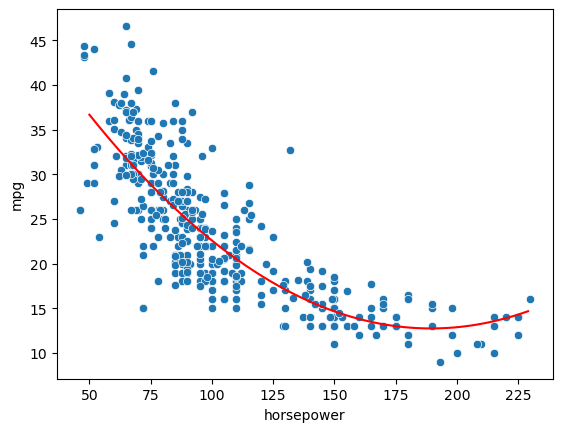

In [42]:
df = sns.load_dataset('mpg') # mile per gallon
df.dropna(inplace=True)
X = df['horsepower'].values.reshape(-1, 1)
y = df['mpg']
# sns.scatterplot(x=df['horsepower'], y=y) # 非線形の形になっている

# 多項式特徴量
poly = PolynomialFeatures(2, include_bias=False)
X_poly = poly.fit_transform(X)

# 線形回帰
model = LinearRegression()
model.fit(X_poly, y)

# 描画
X_axis = np.arange(50, 230).reshape(-1, 1)
X_axis_ = poly.fit_transform(X_axis)
pred = model.predict(X_axis_)
sns.scatterplot(x=df['horsepower'], y=y)
plt.plot(X_axis, pred, 'r')
X_poly

In [43]:
df


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


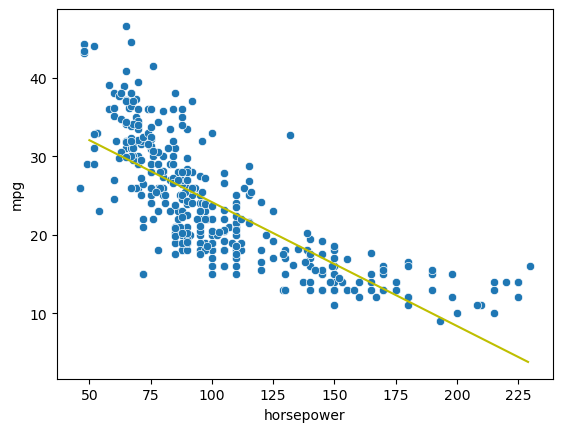

In [44]:
# 多項式回帰
degree = 1
y = df['mpg']
X = df['horsepower'].values.reshape(-1, 1)
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)
X_axis = np.arange(50, 230).reshape(-1, 1)
X_axis_ = poly.fit_transform(X_axis)
pred = model.predict(X_axis_)
sns.scatterplot(x=df['horsepower'], y=y)
plt.plot(X_axis, pred, 'y')


In [45]:
# 5k-Fold
y = df['mpg'].values
X = df['horsepower'].values.reshape(-1, 1)
mse_list = []
rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=0)
for train_index, test_index in rkf.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  model = LinearRegression()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  mse_list.append(mse)

mse_list


[22.026387306979764,
 25.45668389260262,
 26.532717046475174,
 25.801456213568553,
 20.829300555790322,
 23.106573524508253,
 17.763525443463653,
 33.015262410521466,
 22.716723255909763,
 23.93114738253498,
 24.715949620819842,
 22.762758907982462,
 23.176567308210767,
 23.50960708966271,
 28.18621706154978]

In [46]:
y = df['mpg'].values
X = df['horsepower'].values.reshape(-1, 1)
degrees = [1, 2, 3]
model = LinearRegression()
k = 5
n_repeats = 3
cv = RepeatedKFold(n_splits=k, n_repeats=n_repeats)
results = {}
for d in degrees:
  poly = PolynomialFeatures(d)
  X_poly = poly.fit_transform(X)
  scores = cross_val_score(model, X_poly, y, scoring='neg_mean_squared_error', cv=cv)
  results[f"degree {d}"] = {'scores_mean': np.mean(scores), 'scores_std': np.std(scores)}

# 線形よりも非線形の方が値が小さいことが証明される。
pd.DataFrame(results)

,degree 1,degree 2,degree 3
scores_mean,-24.452975,-19.462496,-19.378544
scores_std,3.389502,3.324186,2.951942


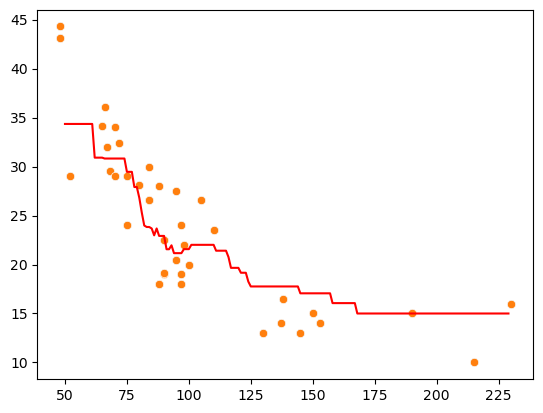

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=0)
sns.scatterplot(x=X_train[:, 0], y=y_train)
model = KNeighborsRegressor(n_neighbors=10)
model.fit(X_train, y_train)
X_axis = np.arange(50, 230).reshape(-1, 1)
y_pred = model.predict(X_axis)
sns.scatterplot(x=X_train[:, 0], y=y_train)
plt.plot(X_axis, y_pred, 'red')

In [48]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=0)
# sns.scatterplot(x=X_train[:, 0], y=y_train)
k_list = np.arange(1, 31)
n_repeats = 3
k = 5
mse_score = 0
score_list = []
results = {}
cv = RepeatedKFold(n_splits=k, n_repeats=n_repeats, random_state=0)

for k in k_list:
  mse_lise = []
  model = KNeighborsRegressor(n_neighbors=k)
  for train_index, test_index in cv.split(X):
    X_k_train, X_k_test = X[train_index], X[test_index]
    y_k_train, y_k_test = y[train_index], y[test_index]
    model = LinearRegression()
    model.fit(X_k_train, y_k_train)
    y_k_pred = model.predict(X_k_test)
    mse = mean_squared_error(y_k_test, y_k_pred)
    mse_list.append(mse)






In [49]:
k_list = np.arange(1, 31)
k = 5
n_repeats = 3
score_list = []
cv = RepeatedKFold(n_splits=k, n_repeats=n_repeats, random_state=0)
for k in k_list:
  model = KNeighborsRegressor(n_neighbors=k)
  scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv)
  score_list.append(-np.mean(scores))

In [50]:
score_list

[29.857690793032567,
 24.10080065995889,
 22.675153846153844,
 21.54294069836633,
 20.481826069457966,
 19.887473487443952,
 19.51072606075861,
 19.00201185187439,
 19.190001815187472,
 18.922065915828195,
 18.89227624836486,
 18.76698840789426,
 18.78906536403368,
 18.729548680523816,
 18.70784648610961,
 18.7113791433382,
 18.728011108752643,
 18.83878756162488,
 18.79942110987337,
 18.819472744779837,
 18.742382075496,
 18.789111795122153,
 18.87168743443922,
 18.870571365567937,
 18.81707820023802,
 18.754750475971903,
 18.743956277742235,
 18.685553433983138,
 18.696420429613283,
 18.724723757077427]

In [76]:
k_list = np.arange(1, 31)
n_repeats = 3
k = 5
score_list = []
results = {}
cv = RepeatedKFold(n_splits=k, n_repeats=n_repeats, random_state=0)

for k in k_list:  # kをk_valに変更しました
    mse_list = []
    for train_index, test_index in cv.split(X):  # 交差検証のループ
        X_k_train, X_k_test = X[train_index], X[test_index]
        y_k_train, y_k_test = y[train_index], y[test_index]

        model = KNeighborsRegressor(n_neighbors=k)
        model.fit(X_k_train, y_k_train)
        y_k_pred = model.predict(X_k_test)
        mse = mean_squared_error(y_k_test, y_k_pred)
        mse_list.append(mse)

    avg_mse = np.mean(mse_list)
    results[k] = avg_mse

# 結果を表示
for k_val, mse in results.items():
    print(f"k={k_val}, MSE={mse}")

KeyError: "None of [Int64Index([  0,   1,   2,   3,   4,   6,   9,  10,  11,  13,\n            ...\n            252, 254, 255, 256, 257, 258, 259, 260, 261, 262],\n           dtype='int64', length=210)] are in the [columns]"

In [75]:
df = pd.read_csv('https://raw.githubusercontent.com/kirenz/datasets/master/Hitters.csv')

# 欠損値対応
df.dropna(inplace=True)

# データの準備
y_col = 'Salary'
X = df.loc[:, df.columns!=y_col]
y = df[y_col]
# 標準化のために数値カラムのリストを作成
numeric_cols = X.select_dtypes(include=np.number).columns.to_list()
# League, Division, NewLeagueをダミー変数にする
X = pd.get_dummies(X, drop_first=True)

# hold-out 学習後のモデルの係数を確認したいので
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# 標準化
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
# テストデータの標準化
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])
# モデル学習
ridge = Ridge()
ridge.fit(X_train, y_train)
# 予測
y_pred = ridge.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred) # 251.01 つまりRidgeのmodelは平均して251.01KドルのSalaryがズレているということになる。
# Ridgeはモデルの複雑性を下げて、Varianceを低くすることができる。-> モデルの精度の向上。 しかし解釈性は向上しない

# 線形回帰との比較
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.coef_ # ridge.coef_と比べると全体的に線形回帰の方が値が大きくなっている。

array([-269.10981701,  272.90887884,   59.97669544,  -55.37512444,
          3.61504229,  131.08295524,  -14.78202567, -514.20110584,
        550.22369897,  -12.29554582,  299.04286135,    4.60615938,
       -156.78117836,   73.32237801,   54.94973217,  -35.64306984,
          1.59251626,  -95.02251105,   28.46798552])

In [70]:
ridge.coef_

array([-255.99352472,  265.41620796,   49.85450911,  -43.4415344 ,
          6.40827279,  126.64463957,  -39.99788141, -180.02267219,
        242.39467113,  -36.09606293,  281.13852012,   46.31799934,
       -164.64027314,   70.88806172,   41.295514  ,  -34.06922615,
         -8.54724705,  -97.91075067,   35.72441367])

In [71]:
X.columns

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors', 'League_N', 'Division_W', 'NewLeague_N'],
      dtype='object')

In [80]:
alphas = np.logspace(-3, 3)
mse_list = []
coefs = []
for alpha in alphas:
  model = Ridge(alpha)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  mse_list.append(mse)
  coefs.append(model.coef_)

mse_list

[121755.5519148937,
 121748.85142321739,
 121740.0008455123,
 121728.32401897234,
 121712.94237460819,
 121692.72191766003,
 121666.2119529472,
 121631.57874599757,
 121586.54167044231,
 121528.32642125867,
 121453.66013599669,
 121358.84632608044,
 121239.97046837119,
 121093.2925158699,
 120915.86710951598,
 120706.37916912172,
 120466.0829485461,
 120199.60670028836,
 119915.29937781747,
 119624.84488816866,
 119342.10042188948,
 119081.44332159926,
 118856.13699970386,
 118677.19450148563,
 118552.95548000323,
 118489.2621020869,
 118489.87087975824,
 118556.67365623645,
 118689.53874258565,
 118886.13914715392,
 119142.65935242688,
 119456.1180274955,
 119827.92637198897,
 120266.92159170505,
 120789.80494522846,
 121418.33915030923,
 122174.90796519503,
 123079.31407912797,
 124149.02580273552,
 125403.18292335409,
 126869.04970382873,
 128589.21806639318,
 130628.562857349,
 133080.70104933387,
 136073.24005204794,
 139768.8808195282,
 144356.52115979916,
 150025.50524303646,
 1